In [1]:
from env import SingleStateSpace 
from generate_trajectory import generate_trajectory
from policy import Boltzmann 
from learn import compute_q_with_pi
from RewardFunctions import SingleStateReward
import numpy as np 
from utils import normalise_pi
from policy_walk import policy_walk 

In [7]:

trajectory_length = 20 
#set up the agent and their policy 
env = SingleStateSpace(n_actions = 10, discount_rate = 0.1, R_max = 5)
#so we have access to env.reward
observation_times = np.cumsum(np.random.uniform(0, 2, size=trajectory_length))
print("Generated observation times:") 
print(observation_times)

#this isn't right but for now I'm just normalising pi - really it should be a boltzmann - later on I turn the Q-vals into a distribution via boltzmann 
#so it won't be able to learn i don't think 


# Use meshgrid to create a grid of all possible combinations of s, a, and t
s_grid, a_grid, t_grid = np.meshgrid(env.states, env.actions, observation_times, indexing='ij')

# Calculate the reward for each combination using vectorized operations - oh I'm not actually using a boltzmann policy here I'm just using a normalised reward vector? 
pi = np.vectorize(env.reward)(s_grid, a_grid, t_grid)
pi = normalise_pi(pi)

#What is my initial policy? Everywhere I've seen, boltzmann is defined using the Q-values but you
#need a policy to find the Q-values so what is the actual policy? 
#Is it just like an exponential style distribution over the rewards? 
observations = generate_trajectory(env, pi, observation_times)

print("Generated trajectory") 
print(observations)

print("Running policy walk") 
learned_pi = policy_walk(env, observations)
print("finished learning policy")

Generated observation times:
[ 1.50524813  3.20700773  4.00990599  5.11263172  5.21569039  6.0826567
  7.88356811  9.61946877  9.83470346 10.48679671 11.95498563 12.85235283
 12.9420618  13.77886548 13.92735048 15.37519344 16.21236153 16.72665952
 18.13260546 18.23356261]
Generated trajectory
[[0, 1, 0], [0, 3, 1], [0, 3, 2], [0, 5, 3], [0, 5, 4], [0, 6, 5], [0, 8, 6], [0, 9, 7], [0, 9, 8], [0, 8, 9], [0, 7, 10], [0, 7, 11], [0, 8, 12], [0, 8, 13], [0, 5, 14], [0, 4, 15], [0, 5, 16], [0, 3, 17], [0, 3, 18], [0, 3, 19]]
Running policy walk
[[[0.09528148 0.09528148 0.09528148 0.09528148 0.09528148 0.09528148
   0.09528148 0.09528148 0.09528148 0.09528148 0.09528148 0.09528148
   0.09528148 0.09528148 0.09528148 0.09528148 0.09528148 0.09528148
   0.09528148 0.09528148]
  [0.10270612 0.10270612 0.10270612 0.10270612 0.10270612 0.10270612
   0.10270612 0.10270612 0.10270612 0.10270612 0.10270612 0.10270612
   0.10270612 0.10270612 0.10270612 0.10270612 0.10270612 0.10270612
   0.10270612 0

KeyboardInterrupt: 

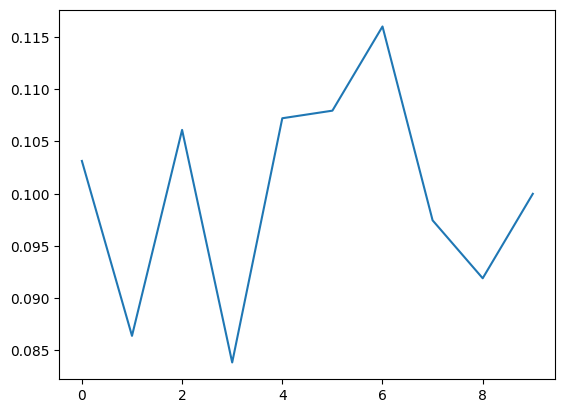

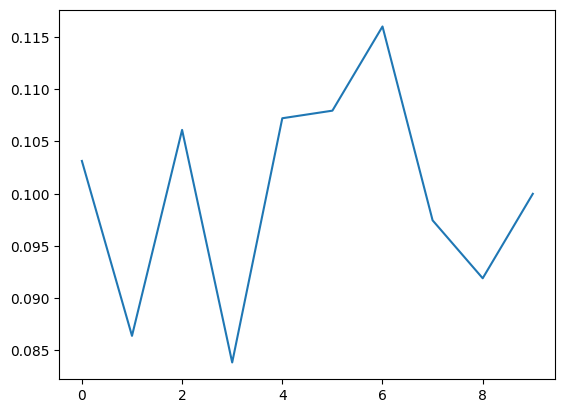

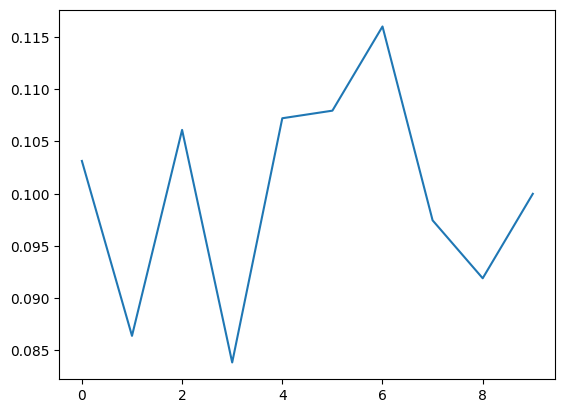

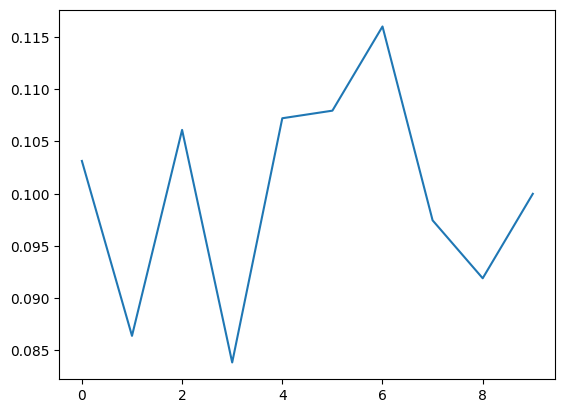

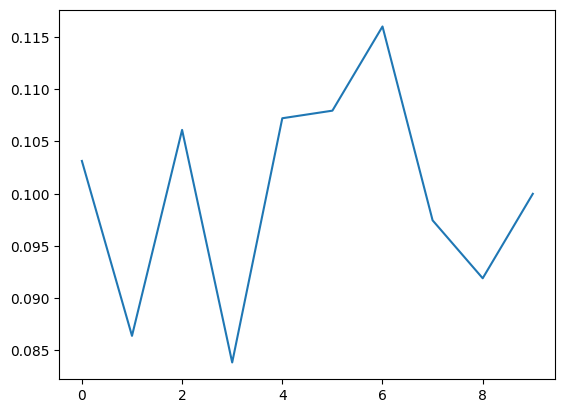

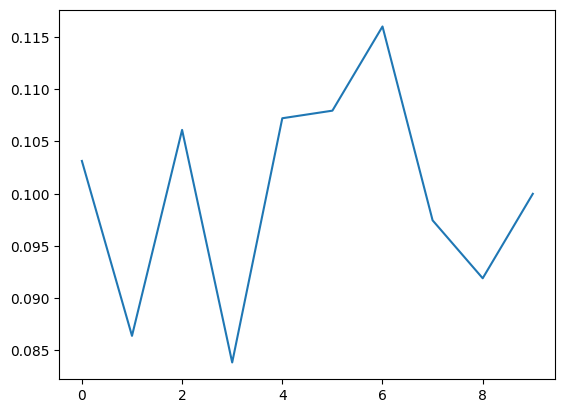

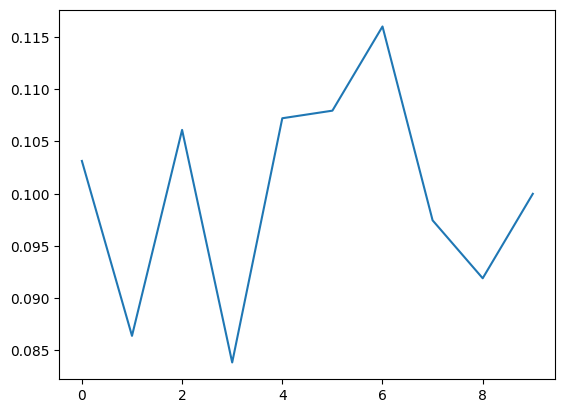

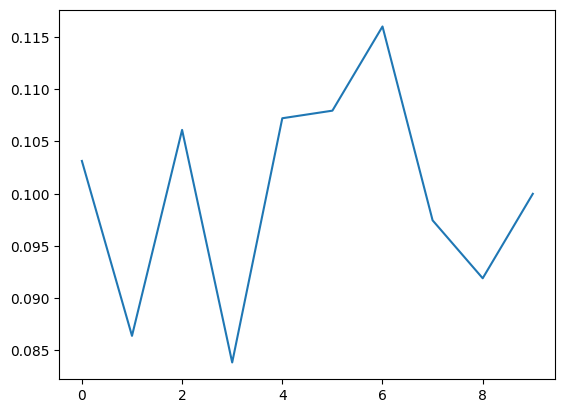

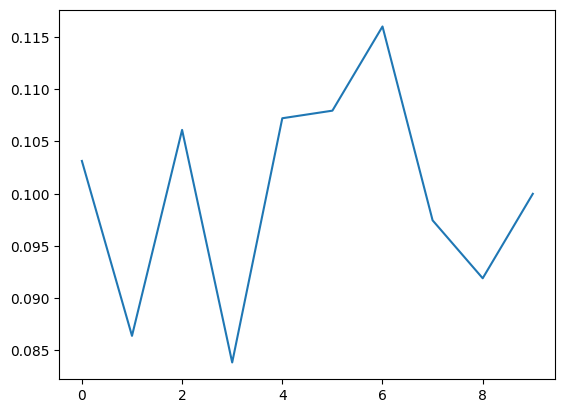

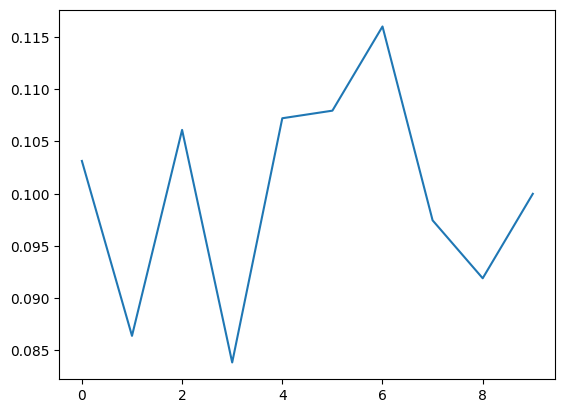

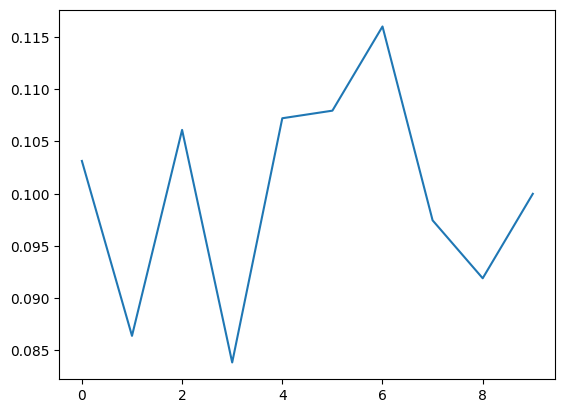

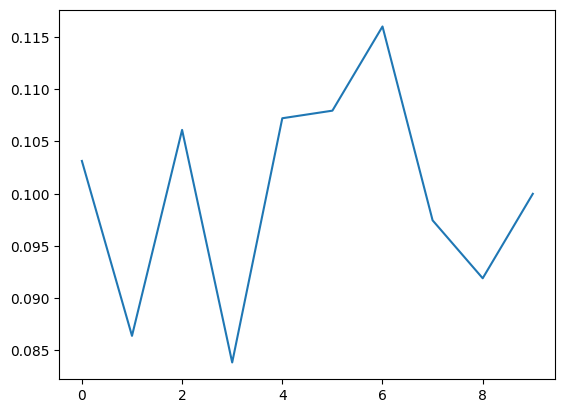

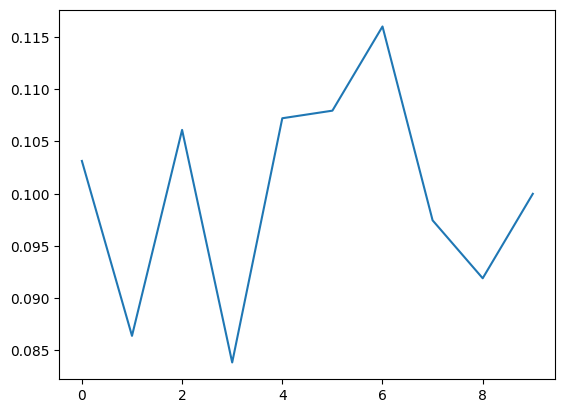

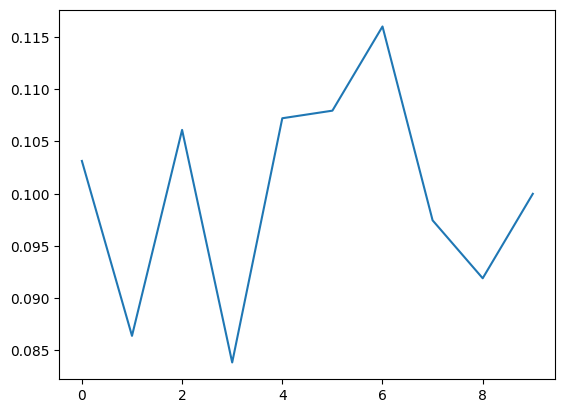

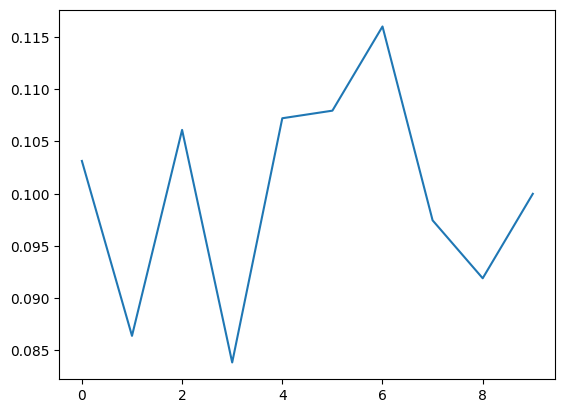

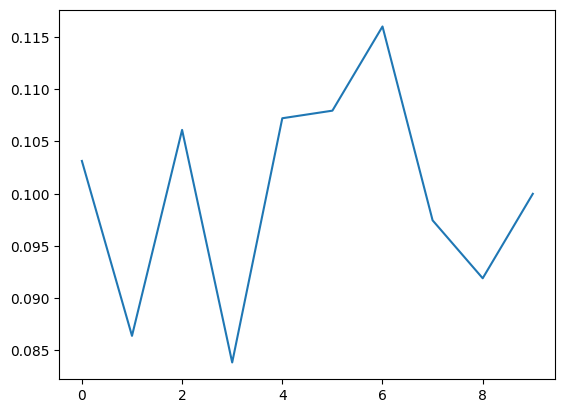

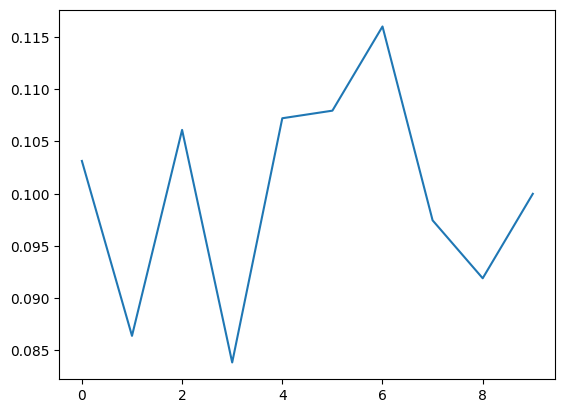

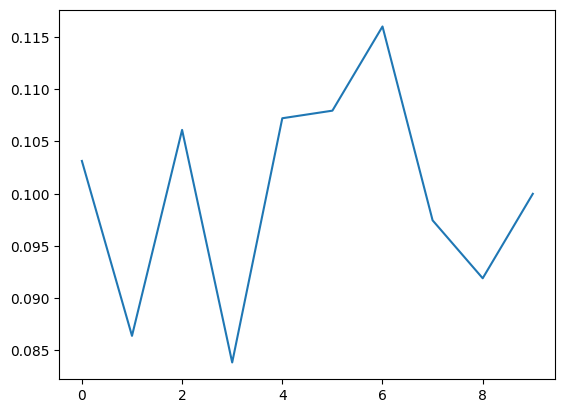

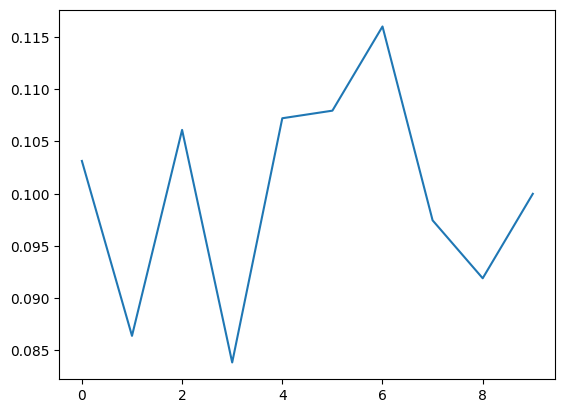

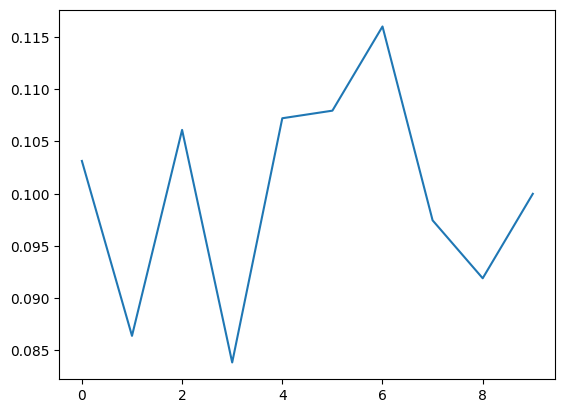

In [6]:
import matplotlib.pyplot as plt 
for t in range(20): 
    plt.plot(learned_pi[0,:,t])
    plt.show()